### DIABETIC PATIENTS' RE-ADMISSION PREDICTION ###

#### Import Liabraries ###

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,accuracy_score

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.subplots as sp 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Import Data ####

In [2]:
df = pd.read_csv("clean_new.csv")

#### Dataset Info ###

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49735 entries, 0 to 49734
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               49735 non-null  int64 
 1   race                      49735 non-null  object
 2   gender                    49735 non-null  object
 3   age                       49735 non-null  object
 4   admission_type_id         49735 non-null  int64 
 5   discharge_disposition_id  49735 non-null  int64 
 6   admission_source_id       49735 non-null  int64 
 7   time_in_hospital          49735 non-null  int64 
 8   medical_specialty         49735 non-null  object
 9   num_lab_procedures        49735 non-null  int64 
 10  num_procedures            49735 non-null  int64 
 11  num_medications           49735 non-null  int64 
 12  number_outpatient         49735 non-null  int64 
 13  number_emergency          49735 non-null  int64 
 14  number_inpatient      

#### Splitting the dataset into numerical and categorical ####

In [4]:
df_num = df[df.columns[df.dtypes == 'int64'] | df.columns[df.dtypes == 'float64']]

In [5]:
df_num

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,63555939,3,3,4,12,33,3,18,0,0,0,8
1,85504905,1,3,7,7,60,0,15,0,1,0,8
2,77586282,1,6,7,10,55,1,31,0,0,0,8
3,108662661,1,1,7,3,29,0,11,0,0,0,3
4,40523301,1,3,7,6,64,3,18,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
49730,106595208,2,6,7,6,46,5,14,0,0,1,9
49731,47293812,1,13,7,3,45,0,26,1,0,1,9
49732,33230016,1,22,7,8,51,6,19,0,0,0,9
49733,106392411,3,6,1,3,27,1,29,0,1,0,9


In [6]:
df_num.dtypes

patient_nbr                 int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
dtype: object

In [7]:
df_num['admission_type_id']  = pd.Categorical(df_num.admission_type_id)

In [8]:
df_num['discharge_disposition_id']  = pd.Categorical(df_num.admission_type_id)

In [9]:
df_num['admission_source_id']  = pd.Categorical(df_num.admission_type_id)

In [10]:
df_num.dtypes

patient_nbr                    int64
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
number_diagnoses               int64
dtype: object

In [11]:
df_num.iloc[:, :4];
df_num.iloc[:, 4:12]

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,12,33,3,18,0,0,0,8
1,7,60,0,15,0,1,0,8
2,10,55,1,31,0,0,0,8
3,3,29,0,11,0,0,0,3
4,6,64,3,18,0,0,0,7
...,...,...,...,...,...,...,...,...
49730,6,46,5,14,0,0,1,9
49731,3,45,0,26,1,0,1,9
49732,8,51,6,19,0,0,0,9
49733,3,27,1,29,0,1,0,9


#### Scaling Numerical columns ####

In [12]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
scaled = std.fit_transform(df_num.iloc[:, 4:12])
scaled = pd.DataFrame(scaled,columns=df_num.iloc[:, 4:12].columns)

scaled

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2.509751,-0.508945,0.895731,0.253445,-0.269890,-0.189272,-0.499507,0.402707
1,0.853011,0.866399,-0.846581,-0.108541,-0.269890,0.708359,-0.499507,0.402707
2,1.847055,0.611706,-0.265810,1.822053,-0.269890,-0.189272,-0.499507,0.402707
3,-0.472382,-0.712700,-0.846581,-0.591190,-0.269890,-0.189272,-0.499507,-2.224208
4,0.521663,1.070154,0.895731,0.253445,-0.269890,-0.189272,-0.499507,-0.122676
...,...,...,...,...,...,...,...,...
49730,0.521663,0.153257,2.057272,-0.229204,-0.269890,-0.189272,0.275238,0.928091
49731,-0.472382,0.102319,-0.846581,1.218742,0.791802,-0.189272,0.275238,0.928091
49732,1.184359,0.407951,2.638043,0.374107,-0.269890,-0.189272,-0.499507,0.928091
49733,-0.472382,-0.814578,-0.265810,1.580729,-0.269890,0.708359,-0.499507,0.928091


#### Merge the scaled data to other numerical columns ####

In [13]:
frames = [df_num.iloc[:, :4], scaled]
df_num = pd.concat(frames, axis = 1)

In [14]:
df_num

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,63555939,3,3,3,2.509751,-0.508945,0.895731,0.253445,-0.269890,-0.189272,-0.499507,0.402707
1,85504905,1,1,1,0.853011,0.866399,-0.846581,-0.108541,-0.269890,0.708359,-0.499507,0.402707
2,77586282,1,1,1,1.847055,0.611706,-0.265810,1.822053,-0.269890,-0.189272,-0.499507,0.402707
3,108662661,1,1,1,-0.472382,-0.712700,-0.846581,-0.591190,-0.269890,-0.189272,-0.499507,-2.224208
4,40523301,1,1,1,0.521663,1.070154,0.895731,0.253445,-0.269890,-0.189272,-0.499507,-0.122676
...,...,...,...,...,...,...,...,...,...,...,...,...
49730,106595208,2,2,2,0.521663,0.153257,2.057272,-0.229204,-0.269890,-0.189272,0.275238,0.928091
49731,47293812,1,1,1,-0.472382,0.102319,-0.846581,1.218742,0.791802,-0.189272,0.275238,0.928091
49732,33230016,1,1,1,1.184359,0.407951,2.638043,0.374107,-0.269890,-0.189272,-0.499507,0.928091
49733,106392411,3,3,3,-0.472382,-0.814578,-0.265810,1.580729,-0.269890,0.708359,-0.499507,0.928091


In [15]:
df_nonnum = df[df.columns[df.dtypes == 'object']]

In [16]:
df_nonnum

,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[90-100),InternalMedicine,434,198,486,None,None,No,No,No,No,No,Steady,Steady,Ch,Yes,NO
1,Caucasian,Female,[40-50),Family/GeneralPractice,428,250.43,250.6,None,None,Steady,No,No,No,No,No,Down,Ch,Yes,<30
2,Caucasian,Male,[80-90),Family/GeneralPractice,428,411,427,None,None,No,No,No,No,No,No,Steady,No,Yes,NO
3,Caucasian,Female,[50-60),Cardiology,682,174,250,None,None,No,No,No,Steady,No,No,No,No,Yes,NO
4,Caucasian,Male,[80-90),Cardiology,427,428,414,None,>7,Steady,No,No,Steady,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,Caucasian,Male,[70-80),Emergency/Trauma,575,577,250,None,Norm,No,No,No,No,No,No,Up,Ch,Yes,NO
49731,Caucasian,Male,[80-90),Emergency/Trauma,486,276,428,None,None,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
49732,Caucasian,Female,[70-80),InternalMedicine,410,311,250,None,>7,No,No,No,No,No,No,Steady,No,Yes,>30
49733,Caucasian,Female,[70-80),Orthopedics,715,401,250,None,Norm,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [17]:
df_nonnum[['diag_1', 'diag_2', 'diag_3']]

,diag_1,diag_2,diag_3
0,434,198,486
1,428,250.43,250.6
2,428,411,427
3,682,174,250
4,427,428,414
...,...,...,...
49730,575,577,250
49731,486,276,428
49732,410,311,250
49733,715,401,250


#### Converting unappropriate values to 000, later these values will be removed ####

In [18]:
df_nonnum['diag_1'] = ['000' if (x.startswith('E') | x.startswith('V')) else x for x in df_nonnum['diag_1'] ];
df_nonnum['diag_1']

0        434
1        428
2        428
3        682
4        427
        ... 
49730    575
49731    486
49732    410
49733    715
49734    996
Name: diag_1, Length: 49735, dtype: object

In [19]:
df_nonnum['diag_2'] = ['000' if (x.startswith('E') | x.startswith('V')) else x for x in df_nonnum['diag_2'] ];
df_nonnum['diag_2']

0           198
1        250.43
2           411
3           174
4           428
          ...  
49730       577
49731       276
49732       311
49733       401
49734       285
Name: diag_2, Length: 49735, dtype: object

In [20]:
df_nonnum['diag_3'] = ['000' if (x.startswith('E') | x.startswith('V')) else x for x in df_nonnum['diag_3'] ];
df_nonnum['diag_3']

0          486
1        250.6
2          427
3          250
4          414
         ...  
49730      250
49731      428
49732      250
49733      250
49734      998
Name: diag_3, Length: 49735, dtype: object

In [21]:
df_nonnum[['diag_1', 'diag_2', 'diag_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49735 entries, 0 to 49734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   diag_1  49735 non-null  object
 1   diag_2  49735 non-null  object
 2   diag_3  49735 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [22]:
df_nonnum['diag_1']  = pd.to_numeric(df_nonnum.diag_1)

In [23]:
df_nonnum['diag_2']  = pd.to_numeric(df_nonnum.diag_2)

In [24]:
df_nonnum['diag_3']  = pd.to_numeric(df_nonnum.diag_3)

In [25]:
df_nonnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49735 entries, 0 to 49734
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   race               49735 non-null  object 
 1   gender             49735 non-null  object 
 2   age                49735 non-null  object 
 3   medical_specialty  49735 non-null  object 
 4   diag_1             49735 non-null  float64
 5   diag_2             49735 non-null  float64
 6   diag_3             49735 non-null  float64
 7   max_glu_serum      49735 non-null  object 
 8   A1Cresult          49735 non-null  object 
 9   metformin          49735 non-null  object 
 10  glimepiride        49735 non-null  object 
 11  glipizide          49735 non-null  object 
 12  glyburide          49735 non-null  object 
 13  pioglitazone       49735 non-null  object 
 14  rosiglitazone      49735 non-null  object 
 15  insulin            49735 non-null  object 
 16  change             497

In [26]:
df_nonnum.drop(df_nonnum[df_nonnum['gender'] == 'Unknown/Invalid'].index, inplace = True)

In [27]:
df_nonnum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49734 entries, 0 to 49734
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   race               49734 non-null  object 
 1   gender             49734 non-null  object 
 2   age                49734 non-null  object 
 3   medical_specialty  49734 non-null  object 
 4   diag_1             49734 non-null  float64
 5   diag_2             49734 non-null  float64
 6   diag_3             49734 non-null  float64
 7   max_glu_serum      49734 non-null  object 
 8   A1Cresult          49734 non-null  object 
 9   metformin          49734 non-null  object 
 10  glimepiride        49734 non-null  object 
 11  glipizide          49734 non-null  object 
 12  glyburide          49734 non-null  object 
 13  pioglitazone       49734 non-null  object 
 14  rosiglitazone      49734 non-null  object 
 15  insulin            49734 non-null  object 
 16  change             497

#### Encoding the categorical columns - Label Encoding ####

In [28]:
le = preprocessing.LabelEncoder()

In [29]:
le.fit(df_nonnum.gender)
df_nonnum.gender = le.transform(df_nonnum.gender)

In [30]:
le.fit(df_nonnum['race'])
df_nonnum['race'] = le.transform(df_nonnum['race'])

In [31]:
le.fit(df_nonnum['age'])
df_nonnum['age'] = le.transform(df_nonnum['age'])

In [32]:
df_to_encode = df_nonnum.iloc[0:, 7:18]

In [33]:
df_to_encode.columns

Index(['max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed'],
      dtype='object')

In [34]:
for column in df_to_encode.columns:
    le.fit(df_nonnum[column])
    df_nonnum[column] = le.transform(df_nonnum[column])

In [35]:
df_nonnum.drop('medical_specialty', axis=1, inplace= True)

In [36]:
df_nonnum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49734 entries, 0 to 49734
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   race           49734 non-null  int32  
 1   gender         49734 non-null  int32  
 2   age            49734 non-null  int32  
 3   diag_1         49734 non-null  float64
 4   diag_2         49734 non-null  float64
 5   diag_3         49734 non-null  float64
 6   max_glu_serum  49734 non-null  int32  
 7   A1Cresult      49734 non-null  int32  
 8   metformin      49734 non-null  int32  
 9   glimepiride    49734 non-null  int32  
 10  glipizide      49734 non-null  int32  
 11  glyburide      49734 non-null  int32  
 12  pioglitazone   49734 non-null  int32  
 13  rosiglitazone  49734 non-null  int32  
 14  insulin        49734 non-null  int32  
 15  change         49734 non-null  int32  
 16  diabetesMed    49734 non-null  int32  
 17  readmitted     49734 non-null  object 
dtypes: flo

In [37]:
target = df_nonnum['readmitted']

In [38]:
df_nonnum.drop('readmitted', axis=1, inplace= True)

In [39]:
df_num

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,63555939,3,3,3,2.509751,-0.508945,0.895731,0.253445,-0.269890,-0.189272,-0.499507,0.402707
1,85504905,1,1,1,0.853011,0.866399,-0.846581,-0.108541,-0.269890,0.708359,-0.499507,0.402707
2,77586282,1,1,1,1.847055,0.611706,-0.265810,1.822053,-0.269890,-0.189272,-0.499507,0.402707
3,108662661,1,1,1,-0.472382,-0.712700,-0.846581,-0.591190,-0.269890,-0.189272,-0.499507,-2.224208
4,40523301,1,1,1,0.521663,1.070154,0.895731,0.253445,-0.269890,-0.189272,-0.499507,-0.122676
...,...,...,...,...,...,...,...,...,...,...,...,...
49730,106595208,2,2,2,0.521663,0.153257,2.057272,-0.229204,-0.269890,-0.189272,0.275238,0.928091
49731,47293812,1,1,1,-0.472382,0.102319,-0.846581,1.218742,0.791802,-0.189272,0.275238,0.928091
49732,33230016,1,1,1,1.184359,0.407951,2.638043,0.374107,-0.269890,-0.189272,-0.499507,0.928091
49733,106392411,3,3,3,-0.472382,-0.814578,-0.265810,1.580729,-0.269890,0.708359,-0.499507,0.928091


In [40]:
df_nonnum

,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed
0,2,0,9,434.0,198.00,486.0,2,2,1,1,1,1,1,2,2,0,1
1,2,0,4,428.0,250.43,250.6,2,2,2,1,1,1,1,1,0,0,1
2,2,1,8,428.0,411.00,427.0,2,2,1,1,1,1,1,1,2,1,1
3,2,0,5,682.0,174.00,250.0,2,2,1,1,1,2,1,1,1,1,1
4,2,1,8,427.0,428.00,414.0,2,0,2,1,1,2,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,2,1,7,575.0,577.00,250.0,2,3,1,1,1,1,1,1,3,0,1
49731,2,1,8,486.0,276.00,428.0,2,2,1,1,1,3,1,2,0,0,1
49732,2,0,7,410.0,311.00,250.0,2,0,1,1,1,1,1,1,2,1,1
49733,2,0,7,715.0,401.00,250.0,2,3,2,1,2,1,1,1,2,0,1


In [41]:
frames = [df_num, df_nonnum]
df_final = pd.concat(frames, axis = 1)

In [42]:
df_final.drop('patient_nbr', axis=1, inplace= True)

In [43]:
frames = [df_final, target]
df_final = pd.concat(frames, axis = 1)

In [44]:
df_final

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,3,3,3,2.509751,-0.508945,0.895731,0.253445,-0.269890,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,NO
1,1,1,1,0.853011,0.866399,-0.846581,-0.108541,-0.269890,0.708359,-0.499507,...,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,<30
2,1,1,1,1.847055,0.611706,-0.265810,1.822053,-0.269890,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NO
3,1,1,1,-0.472382,-0.712700,-0.846581,-0.591190,-0.269890,-0.189272,-0.499507,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NO
4,1,1,1,0.521663,1.070154,0.895731,0.253445,-0.269890,-0.189272,-0.499507,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,2,2,2,0.521663,0.153257,2.057272,-0.229204,-0.269890,-0.189272,0.275238,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,NO
49731,1,1,1,-0.472382,0.102319,-0.846581,1.218742,0.791802,-0.189272,0.275238,...,1.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0,1.0,NO
49732,1,1,1,1.184359,0.407951,2.638043,0.374107,-0.269890,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,>30
49733,3,3,3,-0.472382,-0.814578,-0.265810,1.580729,-0.269890,0.708359,-0.499507,...,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,NO


In [45]:
df_final.dropna(inplace = True)

In [46]:
df_final.isna().sum()

admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
race                        0
gender                      0
age                         0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49734 entries, 0 to 49734
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   admission_type_id         49734 non-null  category
 1   discharge_disposition_id  49734 non-null  category
 2   admission_source_id       49734 non-null  category
 3   time_in_hospital          49734 non-null  float64 
 4   num_lab_procedures        49734 non-null  float64 
 5   num_procedures            49734 non-null  float64 
 6   num_medications           49734 non-null  float64 
 7   number_outpatient         49734 non-null  float64 
 8   number_emergency          49734 non-null  float64 
 9   number_inpatient          49734 non-null  float64 
 10  number_diagnoses          49734 non-null  float64 
 11  race                      49734 non-null  float64 
 12  gender                    49734 non-null  float64 
 13  age                       49734 non-null  floa

In [48]:
df_final.drop(df_final[df_final['diag_1'] == 000].index, inplace = True)

In [49]:
df_final.drop(df_final[df_final['diag_2'] == 000].index, inplace = True)

In [50]:
df_final.drop(df_final[df_final['diag_3'] == 000].index, inplace = True)

In [51]:
df_final

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,3,3,3,2.509751,-0.508945,0.895731,0.253445,-0.269890,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,NO
1,1,1,1,0.853011,0.866399,-0.846581,-0.108541,-0.269890,0.708359,-0.499507,...,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,<30
2,1,1,1,1.847055,0.611706,-0.265810,1.822053,-0.269890,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NO
3,1,1,1,-0.472382,-0.712700,-0.846581,-0.591190,-0.269890,-0.189272,-0.499507,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NO
4,1,1,1,0.521663,1.070154,0.895731,0.253445,-0.269890,-0.189272,-0.499507,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,2,2,2,0.521663,0.153257,2.057272,-0.229204,-0.269890,-0.189272,0.275238,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,NO
49731,1,1,1,-0.472382,0.102319,-0.846581,1.218742,0.791802,-0.189272,0.275238,...,1.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0,1.0,NO
49732,1,1,1,1.184359,0.407951,2.638043,0.374107,-0.269890,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,>30
49733,3,3,3,-0.472382,-0.814578,-0.265810,1.580729,-0.269890,0.708359,-0.499507,...,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,NO


In [52]:
#correlation

correlation = df_final.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [53]:
#convert to array
corr_array  = np.array(correlation)

In [54]:
correlation

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race,gender,...,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed
time_in_hospital,1.000000,0.302689,0.166438,0.461570,-0.007693,-0.007386,0.075191,0.240340,-0.021637,-0.032860,...,-0.042867,-0.014292,0.011897,0.008526,0.001227,-0.005588,-0.009329,0.065299,-0.134801,0.095857
num_lab_procedures,0.302689,1.000000,0.058214,0.243546,-0.035101,-0.017163,0.035417,0.148760,-0.013920,-0.006734,...,-0.161574,-0.049356,-0.001084,0.015352,-0.008196,-0.021459,-0.016436,0.039005,-0.063714,0.046820
num_procedures,0.166438,0.058214,1.000000,0.371096,0.000964,-0.030807,-0.060367,0.082522,0.028020,0.068861,...,-0.000065,-0.046032,-0.000737,-0.000638,-0.004324,0.019988,0.002012,0.012309,-0.011661,-0.010152
num_medications,0.461570,0.243546,0.371096,1.000000,0.050654,0.014693,0.058538,0.250516,0.000880,-0.024733,...,-0.013041,0.055664,0.034854,0.050393,0.018047,0.063647,0.045546,0.075584,-0.267560,0.209350
number_outpatient,-0.007693,-0.035101,0.000964,0.050654,1.000000,0.077765,0.099677,0.076542,0.050144,0.005136,...,0.020425,-0.000993,-0.009849,0.001336,0.003367,0.023024,0.007876,-0.018675,-0.038446,0.022516
number_emergency,-0.007386,-0.017163,-0.030807,0.014693,0.077765,1.000000,0.269682,0.057472,-0.013418,-0.012704,...,0.009119,0.000203,0.008390,-0.005506,-0.019356,0.000327,-0.005932,0.018341,-0.057031,0.038778
number_inpatient,0.075191,0.035417,-0.060367,0.058538,0.099677,0.269682,1.000000,0.125569,-0.025530,-0.010221,...,0.027998,-0.073827,-0.010542,-0.033828,-0.032393,-0.030452,-0.025429,0.028940,-0.035080,0.043949
number_diagnoses,0.240340,0.148760,0.082522,0.250516,0.076542,0.057472,0.125569,1.000000,0.087376,0.003568,...,0.001350,-0.068021,0.019640,-0.018364,-0.026372,-0.005472,-0.013407,0.007822,-0.091102,0.046719
race,-0.021637,-0.013920,0.028020,0.000880,0.050144,-0.013418,-0.025530,0.087376,1.000000,0.080141,...,0.006030,0.014377,0.024406,0.000905,0.019954,0.016050,0.009743,-0.039448,-0.009337,-0.008742
gender,-0.032860,-0.006734,0.068861,-0.024733,0.005136,-0.012704,-0.010221,0.003568,0.080141,1.000000,...,-0.017805,0.001807,-0.000400,0.020633,0.031360,0.008505,0.008424,-0.002868,-0.008696,0.008968


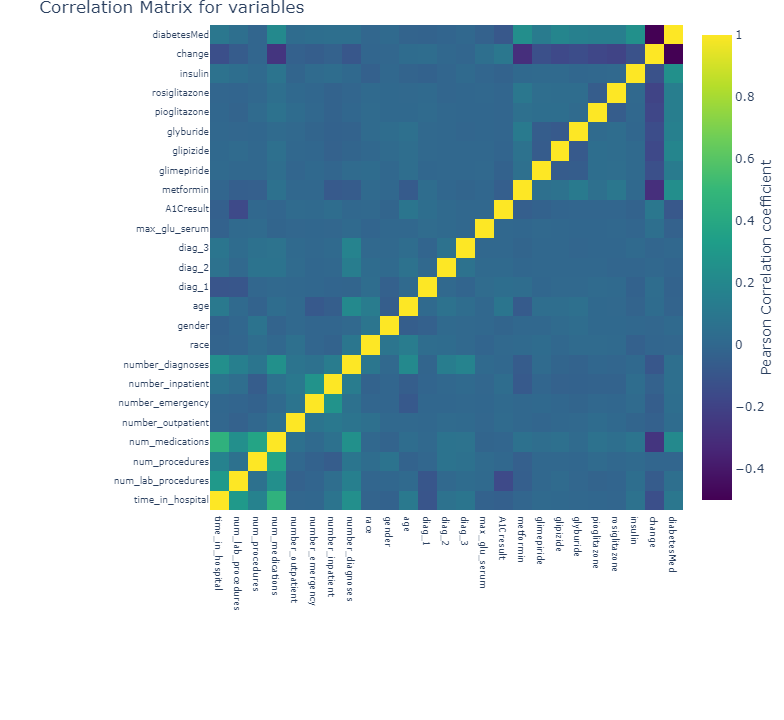

In [55]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [56]:
df_X = df_final.iloc[: , :28] ;
df_X

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed
0,3,3,3,2.509751,-0.508945,0.895731,0.253445,-0.269890,-0.189272,-0.499507,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
1,1,1,1,0.853011,0.866399,-0.846581,-0.108541,-0.269890,0.708359,-0.499507,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
2,1,1,1,1.847055,0.611706,-0.265810,1.822053,-0.269890,-0.189272,-0.499507,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
3,1,1,1,-0.472382,-0.712700,-0.846581,-0.591190,-0.269890,-0.189272,-0.499507,...,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
4,1,1,1,0.521663,1.070154,0.895731,0.253445,-0.269890,-0.189272,-0.499507,...,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,2,2,2,0.521663,0.153257,2.057272,-0.229204,-0.269890,-0.189272,0.275238,...,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0
49731,1,1,1,-0.472382,0.102319,-0.846581,1.218742,0.791802,-0.189272,0.275238,...,2.0,1.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0,1.0
49732,1,1,1,1.184359,0.407951,2.638043,0.374107,-0.269890,-0.189272,-0.499507,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
49733,3,3,3,-0.472382,-0.814578,-0.265810,1.580729,-0.269890,0.708359,-0.499507,...,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0


In [57]:
df_Y = df_final['readmitted'];
df_Y

0         NO
1        <30
2         NO
3         NO
4         NO
        ... 
49730     NO
49731     NO
49732    >30
49733     NO
49734     NO
Name: readmitted, Length: 45553, dtype: object

#### Train the model ####

In [58]:
X_train,X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size = .20 ,random_state = 123)

In [59]:
X_train

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed
43153,2,2,2,-1.135078,-2.138983,-0.846581,-0.349866,-0.269890,-0.189272,0.275238,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,0.0,1.0
15320,5,5,5,-0.803730,-2.138983,-0.846581,-1.073839,-0.269890,0.708359,-0.499507,...,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
22661,1,1,1,-0.472382,0.357012,-0.846581,-0.229204,-0.269890,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0
44932,2,2,2,0.521663,0.255135,-0.846581,-0.832514,-0.269890,-0.189272,-0.499507,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
48936,3,3,3,-0.803730,-0.610823,-0.265810,0.374107,-0.269890,-0.189272,-0.499507,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,2,2,2,0.521663,-0.356129,-0.265810,-0.591190,-0.269890,-0.189272,-0.499507,...,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
16742,1,1,1,-0.141034,0.764522,-0.265810,-1.435825,1.853493,0.708359,-0.499507,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
19331,1,1,1,0.853011,0.102319,-0.846581,0.253445,-0.269890,0.708359,0.275238,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0
30572,3,3,3,-0.803730,-2.138983,0.314960,-1.073839,-0.269890,-0.189272,-0.499507,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0


In [60]:
df_final_copy = df_final.copy();

In [61]:
df_final_copy= df_final_copy.loc[df_final_copy['readmitted'] != 'NO']

In [62]:
df_final_copy

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
1,1,1,1,0.853011,0.866399,-0.846581,-0.108541,-0.26989,0.708359,-0.499507,...,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,<30
5,1,1,1,-0.803730,-0.916455,0.314960,-0.591190,-0.26989,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,>30
6,1,1,1,0.190314,0.458890,-0.846581,-0.229204,-0.26989,-0.189272,-0.499507,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,>30
7,1,1,1,0.521663,-0.814578,-0.846581,0.012121,-0.26989,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,>30
8,1,1,1,-0.803730,-0.101436,-0.846581,-0.591190,-0.26989,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49718,1,1,1,0.190314,1.172031,-0.846581,0.977418,-0.26989,-0.189272,1.824729,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,>30
49722,2,2,2,-0.141034,1.070154,1.476502,0.856756,-0.26989,-0.189272,-0.499507,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,<30
49724,1,1,1,-0.472382,1.172031,-0.265810,0.253445,-0.26989,-0.189272,0.275238,...,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,>30
49727,2,2,2,0.190314,1.426725,2.057272,0.856756,-0.26989,-0.189272,-0.499507,...,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,>30


#### Splitting the dataset for modelling ####

In [63]:
df_X = df_final_copy.iloc[: , :28]  ;
df_X

df_Y = df_final_copy['readmitted'];
df_Y

X_train,X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size = .20 ,random_state = 123)

#### Naive Bayes Model

In [64]:
cf_naive = GaussianNB()
cf_naive.fit(X_train,Y_train)

# Predicting the Test set results 
y_pred = cf_naive.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)

# Evaluate the results
print('Accuracy Score:',accuracy_score(Y_test,y_pred))

[[ 113  858]
 [ 177 2947]]
Accuracy Score: 0.7472527472527473


#### KNN Model

In [65]:
cf_knn = KNeighborsClassifier(n_neighbors=3)
cf_knn.fit(X_train, Y_train)  

# Predicting the Test set results 
y_pred = cf_knn.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)

# Evaluate the results
print('Accuracy Score:',accuracy_score(Y_test,y_pred))

[[ 159  812]
 [ 434 2690]]
Accuracy Score: 0.6957264957264957


#### Decision Tree Model

In [66]:
cf_dt = DecisionTreeClassifier(random_state=123)
cf_dt.fit(X_train, Y_train) 

# Predicting the Test set results 
y_pred = cf_dt.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)

# Evaluate the results
print('Accuracy Score:',accuracy_score(Y_test,y_pred))

[[ 307  664]
 [ 877 2247]]
Accuracy Score: 0.6236874236874237


#### Random Forest Model

In [67]:
cf_rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=123)
cf_rf.fit(X_train, Y_train)  

# Predicting the Test set results 
y_pred = cf_rf.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)

# Evaluate the results
print('Accuracy Score:',accuracy_score(Y_test,y_pred))

[[  13  958]
 [  12 3112]]
Accuracy Score: 0.7631257631257631


#### Logistic Regression Model

In [68]:
classifier = LogisticRegression(random_state = 123)
classifier.fit(X_train, Y_train)

# Predicting test set
y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)
print(cm)

print(accuracy_score(Y_test, y_pred))


[[   6  965]
 [  12 3112]]
0.7614163614163614


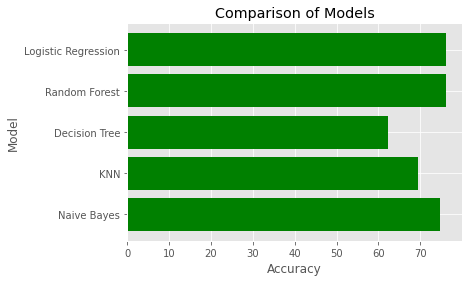

In [69]:
# Model Comarison

y_axis = ['Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']
x_axis = [74.7, 69.5, 62.3, 76.1, 76.1]

plt.style.use('ggplot')

plt.barh(y_axis, x_axis, color = 'green')
plt.title('Comparison of Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()